In [1]:
import pandas as pd
import numpy as np
import datetime
import math

In [2]:
import os
import matplotlib.pyplot as plt


In [3]:
files = [f for f in os.listdir("./data")]

In [4]:
list_data = []
for f in files:
    path = "data/"+f
    list_data.append((pd.read_excel(path,'tag0',index_col="时间"),'tag0_'+f))
    list_data.append((pd.read_excel(path,'tag1',index_col="时间"),'tag1_'+f))

In [5]:
def clean_zeros(df):
    print("with zeros :",df.shape)
    df.plot()
    df_non_zeros = df[(df['x值'] != 0.0) & (df['y值'] !=0.0)]
    print("with zeros elimated :", df_non_zeros.shape)
    df_non_zeros.plot()
    return df_non_zeros

In [6]:
def dataBySecond(df):
    df_n = df.groupby(df.index).mean() # mean value in each second
    # df_n = df.groupby(df.index).max() # max value in each second
    # df_n = df.groupby(df.index).first() # first value in each second
    df_n.plot()
    return df_n

In [10]:
def dataByMinute(df_seconds,path):
    # index to column
    df = df_seconds.copy()
    df['time'] = df.index
    hours = []
    mins = []
    for time in df.index:
        hours.append(time.hour)
        mins.append(time.minute)
    df['hour'] = hours
    df['minute'] = mins
    # print(df)
    df_n = df.groupby(['hour','minute']).mean() # mean value in each minute
    # df_n = df.groupby(['hour','minute']).first() # first value in eahc minute
    # df_n = df.groupby(['hour','minute']).max() # max value in each minute
    # print(df_n)
    df_n.plot()
    df_n.to_excel('results/'+ path.removesuffix('.xlsx')+'_dataByMinute.xlsx')
    return df_n

In [11]:
def dataBy10Minutes(df_seconds,path):
    df = df_seconds.copy()
    # index to column
    df['time'] = df.index
    hours = []
    _10mins = []
    for time in df.index:
        hours.append(time.hour)
        _10mins.append(math.floor(time.minute/10))
    df['hour'] = hours
    df['10minutes'] = _10mins
    # print(df)
    # df_n = df.groupby(['hour','10minutes']).first() # first value in eahc minute 
    df_n = df.groupby(['hour','10minutes']).mean() # mean value in each minute
    # df_n = df.groupby(['hour','10minutes']).max() # max value in each minute
    # print(df_n)
    df_n.plot().figure.savefig('results/'+ path.removesuffix('.xlsx')+'position_groupby_10_mins.png')
    df_n.to_excel('results/'+ path.removesuffix('.xlsx')+'_dataBy10Minute.xlsx')

    return df_n

with zeros : (17213, 2)
with zeros elimated : (6400, 2)


/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0, flags=flags)


with zeros : (60980, 2)
with zeros elimated : (24039, 2)


/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tianchi/anaconda3/envs/ml/lib/python3.

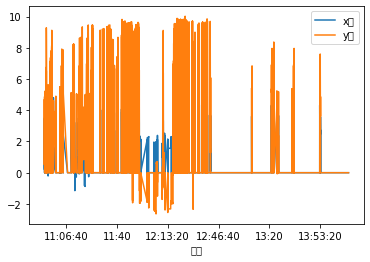

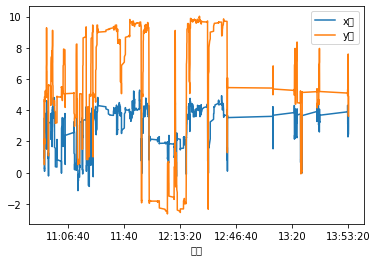

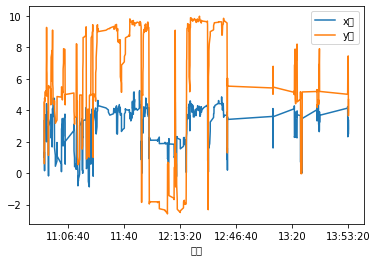

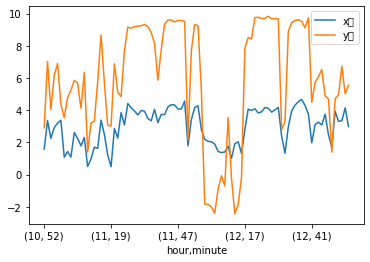

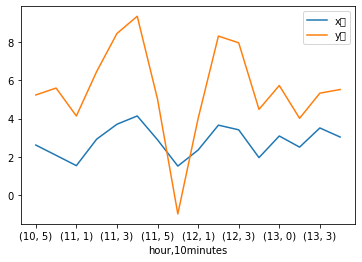

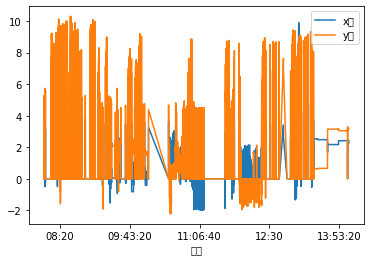

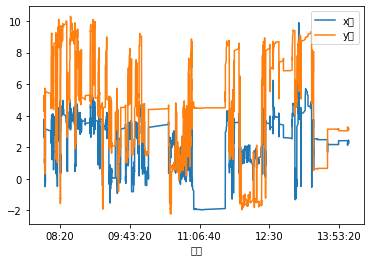

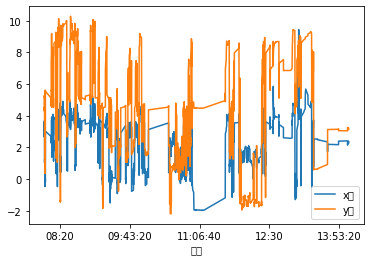

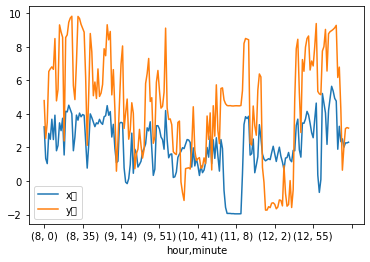

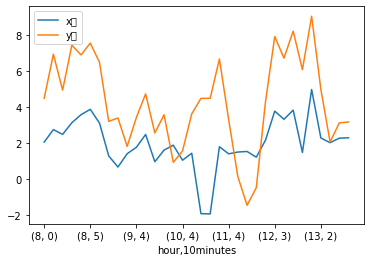

In [12]:
for df,path in list_data:
    df_new = clean_zeros(df)
    df_seconds = dataBySecond(df_new)
    df_minutes = dataByMinute(df_seconds,path)
    df_10minutes = dataBy10Minutes(df_seconds,path)